# Customer Churn Prediction Project

This notebook presents a complete end-to-end Customer Churn Prediction task using the uploaded Telco dataset.

We will:
- Perform Exploratory Data Analysis (EDA)
- Clean and preprocess data
- Build models using Logistic Regression & Random Forest
- Evaluate model performance
- Visualize feature importance

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

## Load Dataset

In [2]:
# Load dataset
data = pd.read_csv("churn_data.csv")
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Information & Cleaning

In [3]:
# Dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [4]:
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values
data.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
# Drop rows with missing TotalCharges
data = data.dropna()

## Exploratory Data Analysis (EDA)

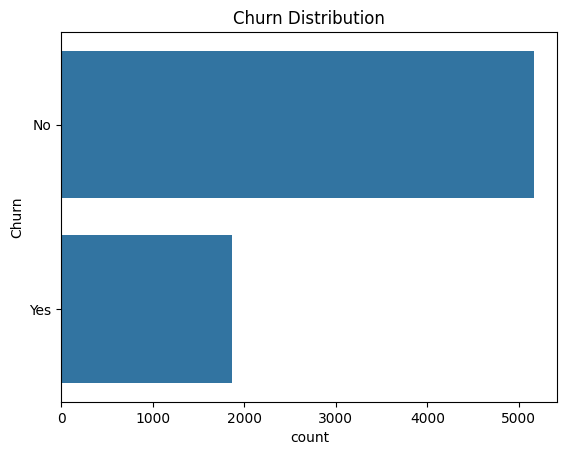

In [6]:
# Churn distribution
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

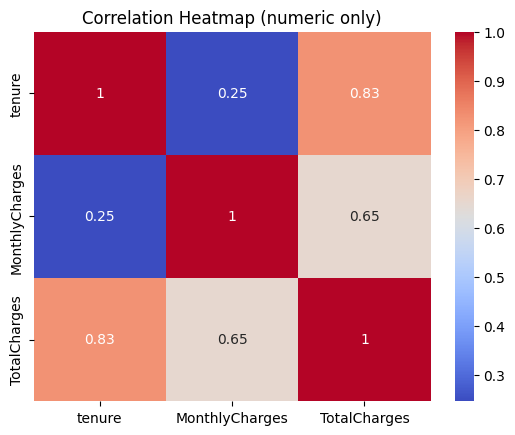

In [9]:
# EDA stage (before encoding)
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (numeric only)")
plt.show()


## Encoding Categorical Variables

In [10]:
# Drop customerID as it's not useful for prediction
data = data.drop('customerID', axis=1)

# Encode target variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Perform one-hot encoding for categorical features
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,True,False,False,True
3,45,42.30,1840.75,0,False,True,False,False,False,False,False
4,2,70.70,151.65,1,True,False,False,True,False,True,False


## Train-Test Split & Scaling

In [12]:
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

In [13]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Random Forest Model

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.57      0.46      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



## Confusion Matrix Comparison

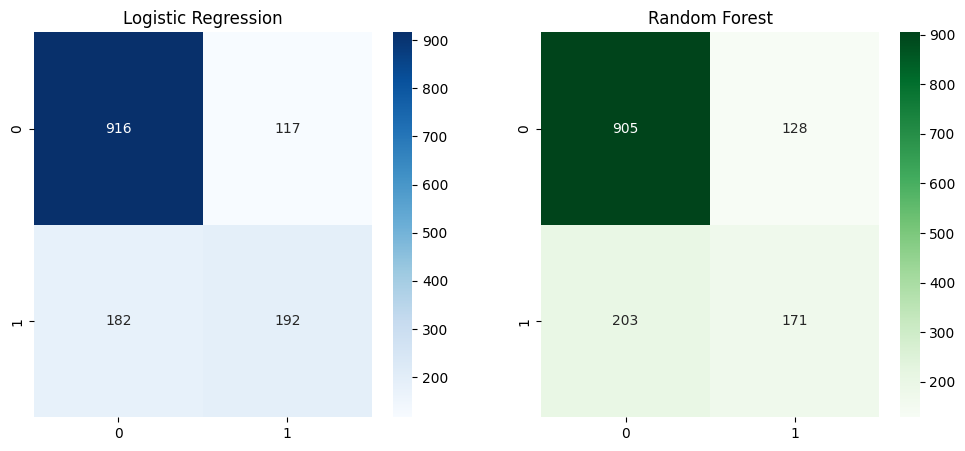

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest')

plt.show()

## ROC-AUC Curve

Logistic Regression AUC: 0.829
Random Forest AUC: 0.804


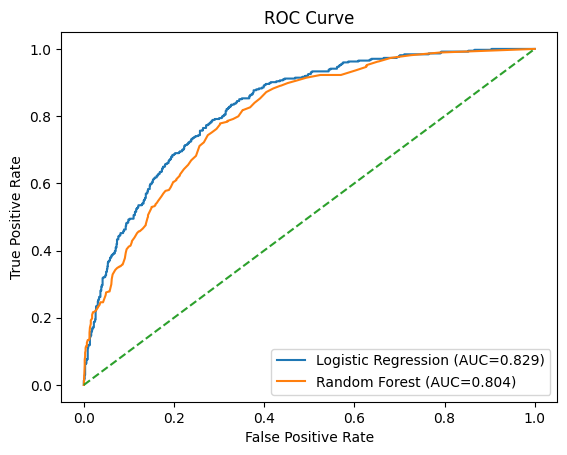

In [16]:
log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

log_auc = roc_auc_score(y_test, log_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print(f"Logistic Regression AUC: {log_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={log_auc:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={rf_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Feature Importance (Random Forest)

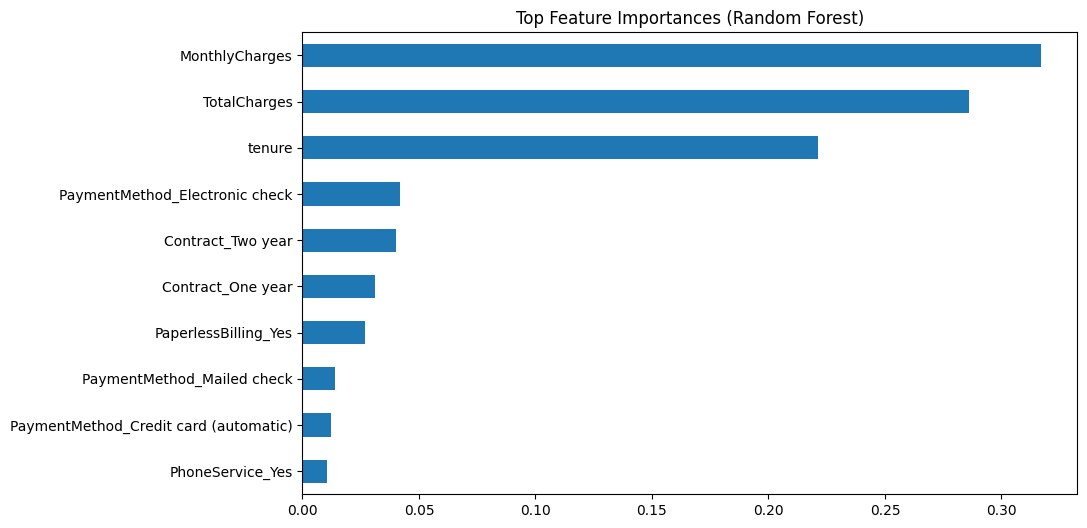

In [17]:
importances = rf_model.feature_importances_
features = X.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances.head(15).plot(kind='barh')
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()